In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Первичная обработка

In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

> Только 3 колонки не содержат пропусков: school, sex, age. Все остальные в той или иной мере отстают.

In [4]:
students.school.value_counts() # Валидные значения 

GP    349
MS     46
Name: school, dtype: int64

In [5]:
students.sex.value_counts() # Валидные значения 

F    208
M    187
Name: sex, dtype: int64

In [6]:
students.age.value_counts() # Валидные значения 

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [7]:
students.address.value_counts() # Валидные значения 

U    295
R     83
Name: address, dtype: int64

In [8]:
students.famsize.value_counts() # Валидные значения 

GT3    261
LE3    107
Name: famsize, dtype: int64

In [9]:
students.famsize.value_counts() # Валидные значения 

GT3    261
LE3    107
Name: famsize, dtype: int64

In [10]:
students.Pstatus.value_counts() # Валидные значения 

T    314
A     36
Name: Pstatus, dtype: int64

In [11]:
students.Medu.value_counts() # Валидные значения 

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [12]:
def limit_range(x, start, end):
    if x >= start and x <= end:
        return x
    else:
        return None

In [13]:
students.Fedu.value_counts() # Выброс - 40

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [14]:
students.Fedu = students.Fedu.apply(lambda x: limit_range(x, 0, 4))
students.Fedu.value_counts()

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [15]:
students.Mjob.value_counts() # Валидные значения 

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [16]:
students.Fjob.value_counts() # Валидные значения 

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [17]:
students.reason.value_counts() # Валидные значения 

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [18]:
students.guardian.value_counts() # Валидные значения 

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [19]:
students.traveltime.value_counts() # Валидные значения 

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [20]:
students.studytime.value_counts() # Валидные значения 

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [21]:
students.failures.value_counts() # Валидные значения 

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [22]:
students.schoolsup.value_counts() # Валидные значения 

no     335
yes     51
Name: schoolsup, dtype: int64

In [23]:
students.famsup.value_counts() # Валидные значения 

yes    219
no     137
Name: famsup, dtype: int64

In [24]:
students.paid.value_counts() # Валидные значения 

no     200
yes    155
Name: paid, dtype: int64

In [25]:
students.activities.value_counts() # Валидные значения 

yes    195
no     186
Name: activities, dtype: int64

In [26]:
students.nursery.value_counts() # Валидные значения 

yes    300
no      79
Name: nursery, dtype: int64

In [27]:
students.higher.value_counts() # Валидные значения 

yes    356
no      19
Name: higher, dtype: int64

In [28]:
students.internet.value_counts() # Валидные значения 

yes    305
no      56
Name: internet, dtype: int64

In [29]:
students.romantic.value_counts() # Валидные значения 

no     240
yes    124
Name: romantic, dtype: int64

In [30]:
students.famrel.value_counts() # Выброс - отрицательное значение

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [31]:
students.famrel = students.famrel.apply(lambda x: limit_range(x, 1, 5))
students.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

In [32]:
students.freetime.value_counts() # Валидные значения 

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [33]:
students.goout.value_counts() # Валидные значения 

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [34]:
students.health.value_counts() # Валидные значения 

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [35]:
students.absences.value_counts() # Потенциальные выбросы. Строим график и считаем квартили

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


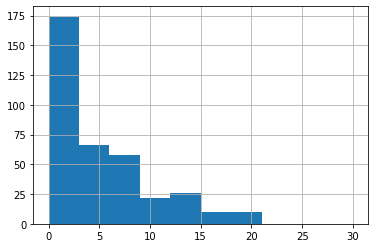

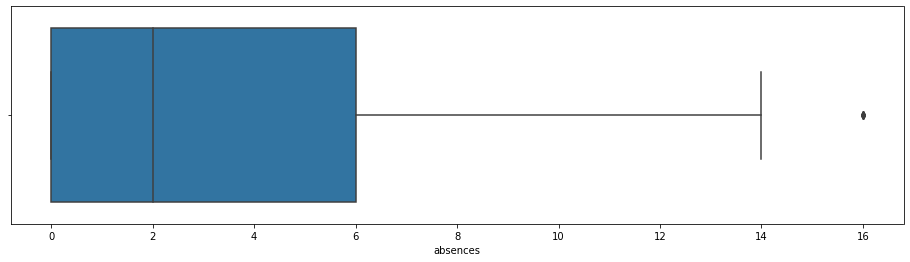

In [36]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

students.absences.loc[students.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 30), label = 'IQR')

fig, ax = plt.subplots(figsize = (16, 4))
sns.boxplot(x='absences', 
                data=students.loc[students.loc[:, 'absences'].isin(students.loc[:, 'absences'].value_counts().index[:10])],
               ax=ax)
plt.show()

> У нас есть несколько явных выбросов (вроде значения 385) и тех, что возле границ. По распределению видно, что основная масса должна уложиться в рамки до 20

In [37]:
students.absences = students.absences.apply(lambda x: limit_range(x, -12, 20))
students.absences.value_counts()

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

In [38]:
students.score.value_counts() # Валидные значения 

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

> Вцелом, можно сказать, что набор данных достаточно качественных. Только 3 колонки с незначительным количеством выбросов.

## Смотрим распределение количественных переменных

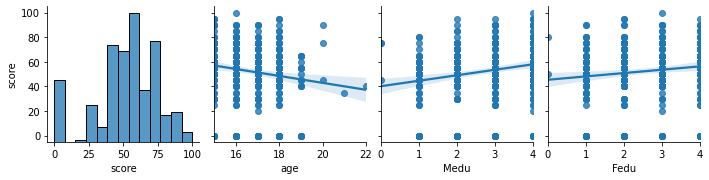

In [44]:
sns.pairplot(students, kind = 'reg', x_vars=["score", "age", "Medu", "Fedu"], y_vars=["score"],)

> Видно, что образование родителей несколько корелирует с оценкой. У возраста есть кореляция в более "старших" значениях, но это скорее всего связано больше с количеством испытуемых старшего возраста.

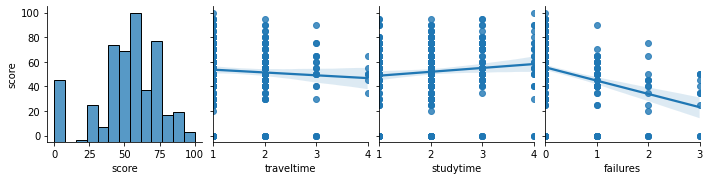

In [58]:
sns.pairplot(students, kind = 'reg', x_vars=["score", "traveltime", "studytime", "failures"], y_vars=["score"],)

> Прослеживается корреляция с временем обучения и количеством неудач. Чем больше ошибок, и меньше времени проведено за учебой, тем хуже балл.

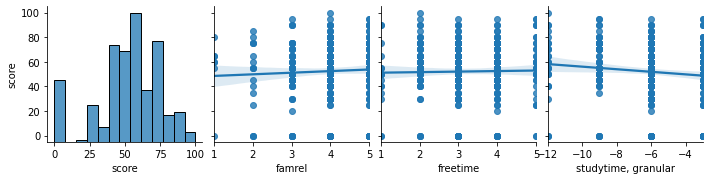

In [61]:
sns.pairplot(students, kind = 'reg', x_vars=["score", "famrel", "freetime", "studytime, granular"], y_vars=["score"],)

> Ничего интересного

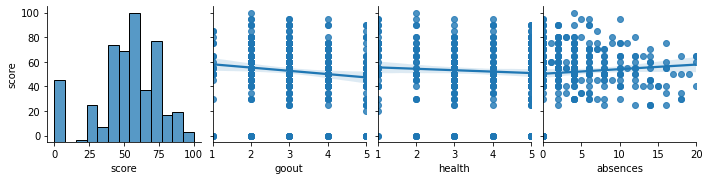

In [60]:
sns.pairplot(students, kind = 'reg', x_vars=["score", "goout", "health", "absences"], y_vars=["score"],)

> Небольшая кореляция с временем на друзей.

## Удаляем колонки, которые не влияют на результат

In [62]:
del students['age']
del students['traveltime']
del students['famrel']
del students['freetime']
del students['health']
del students['absences']
del students['studytime, granular']
students.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,score
0,GP,F,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,30.0
1,GP,F,U,GT3,NaN,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,no,no,no,yes,yes,no,3.0,30.0
2,GP,F,U,LE3,T,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,2.0,50.0
3,GP,F,U,GT3,T,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,75.0
4,GP,F,U,GT3,T,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,yes,yes,no,no,2.0,50.0


## Анализируем номинативные переменные

In [77]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    d = students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:])]
    sns.boxplot(x=column, y='score', 
                data=d,
               ax=ax)
    sns.swarmplot(x=column, y="score", data=d, color=".25")
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

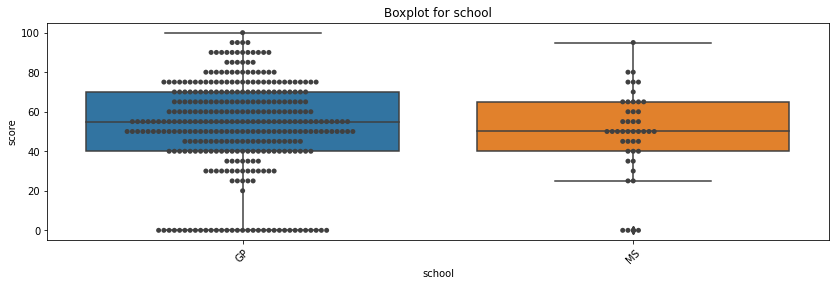

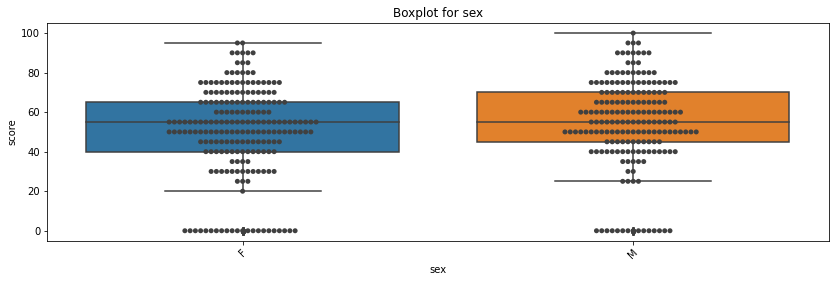

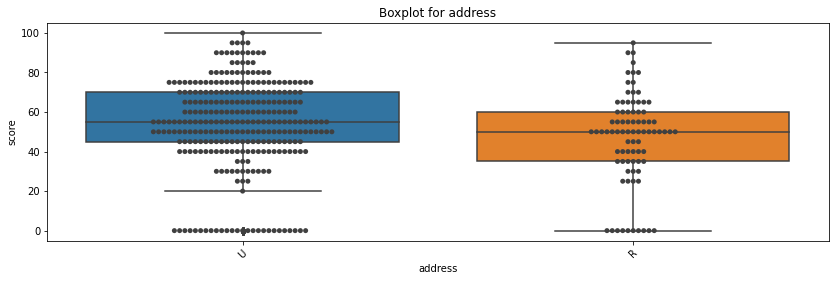

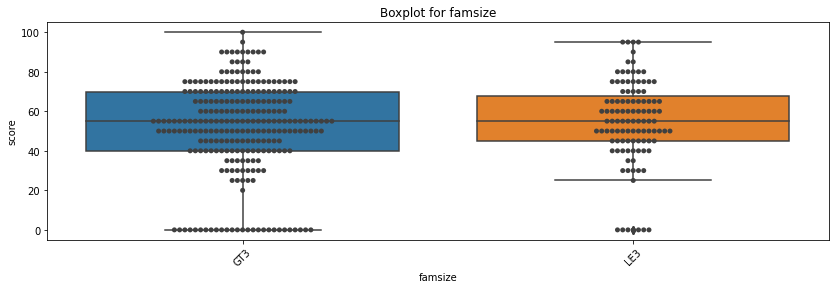

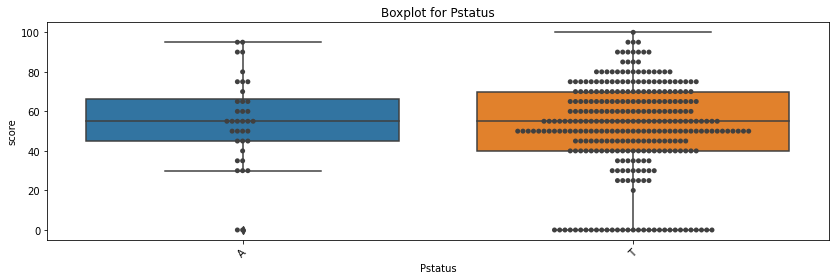

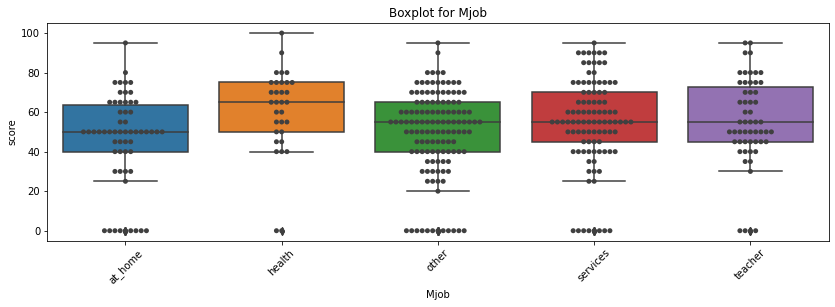

E:\Programs\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


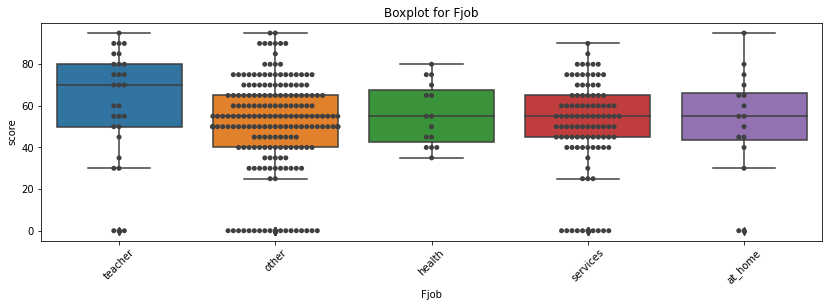

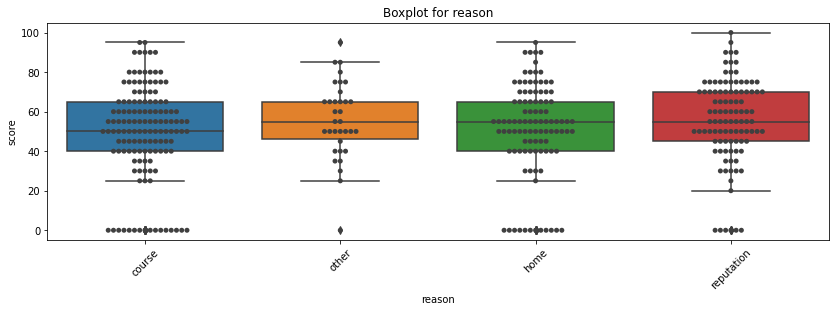

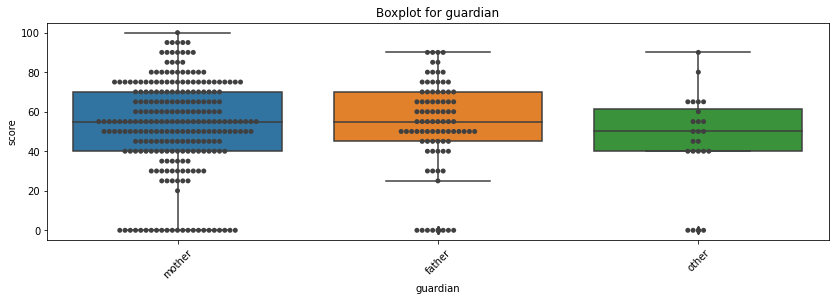

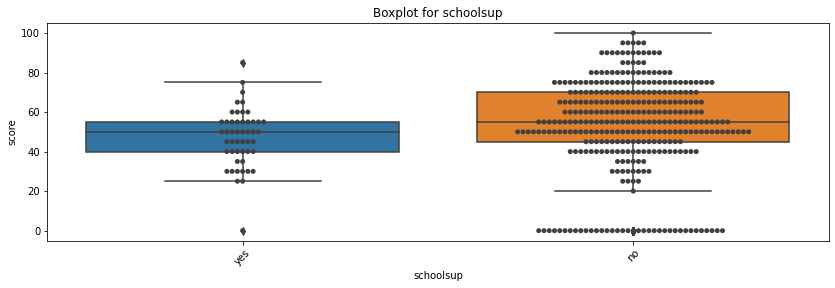

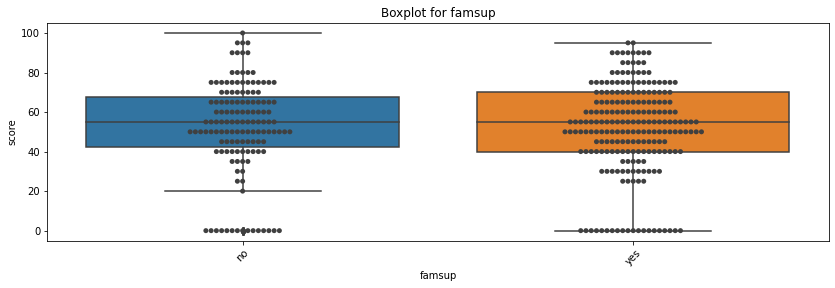

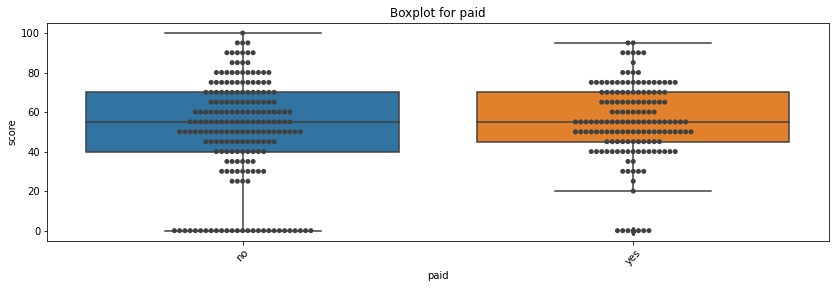

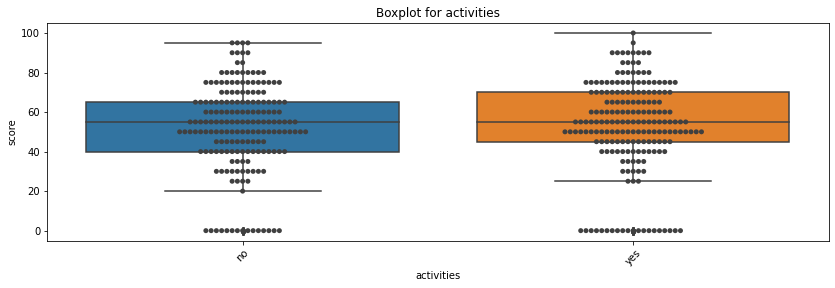

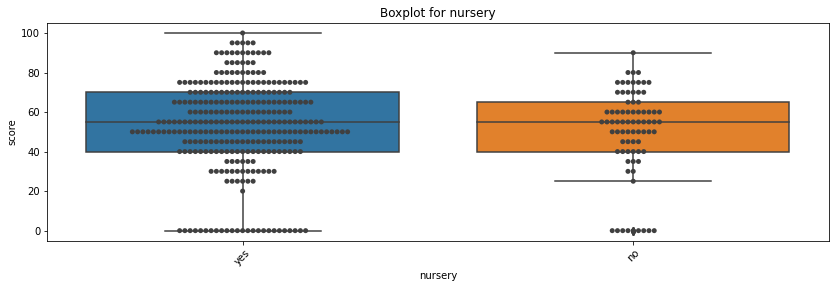

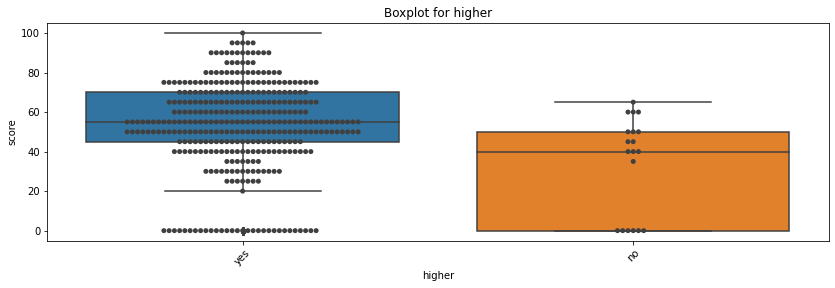

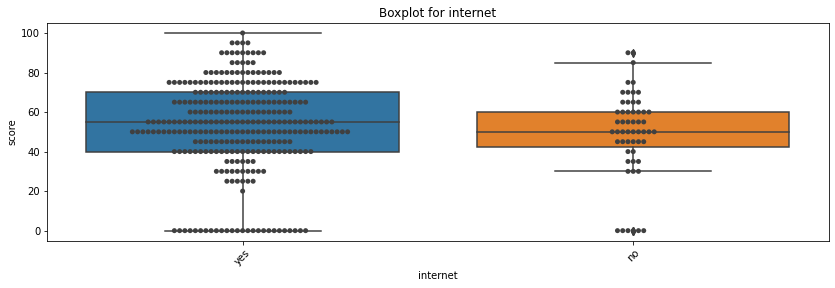

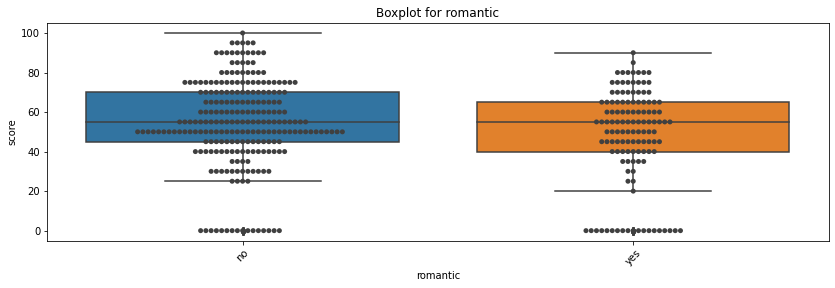

In [78]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

> Большинство значений находятся рядом. Удалим из списка следующие: 'school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic'

In [79]:
del students['school']
del students['sex']
del students['address']
del students['famsize']
del students['Pstatus']
del students['reason']
del students['guardian']
del students['famsup']
del students['paid']
del students['activities']
del students['nursery']
del students['internet']
del students['romantic']
students.head()

,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,goout,score
0,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,4.0,30.0
1,1.0,1.0,at_home,other,2.0,0.0,no,yes,3.0,30.0
2,1.0,1.0,at_home,other,2.0,3.0,yes,yes,2.0,50.0
3,4.0,2.0,health,NaN,3.0,0.0,no,yes,2.0,75.0
4,3.0,3.0,other,other,2.0,0.0,no,yes,2.0,50.0


## Выводы

In [ ]:
1. Только 3 колонки не содержат пропусков: school, sex, age. Все остальные в той или иной мере отстают.
2. Вцелом, можно сказать, что набор данных достаточно качественных. Только 3 колонки с незначительным количеством выбросов.
3. Количественных данных, которые не коррелируют с результатом меньше, чем номинативных.
4. В результате для построения можели получили следующие колонки в наборе: Medu, Fedu, Mjob, Fjob, studytime, failures, schoolsup, higher, goout, score